Initializing Multilingual LLM Evaluation Suite...
MULTILINGUAL LLM EVALUATION SUITE
Models: GPT-4, Claude-3, Gemini-Pro, LLaMA-2
Languages: English, Spanish, French, German, Chinese
Samples per evaluation: 30

[1/20] Evaluating GPT-4 - en

Evaluating GPT-4 for English...
Processing sample 1/30
Processing sample 21/30
✓ Completed evaluation for GPT-4 (en)

[2/20] Evaluating GPT-4 - es

Evaluating GPT-4 for Spanish...
Processing sample 1/30
Processing sample 21/30
✓ Completed evaluation for GPT-4 (es)

[3/20] Evaluating GPT-4 - fr

Evaluating GPT-4 for French...
Processing sample 1/30
Processing sample 21/30
✓ Completed evaluation for GPT-4 (fr)

[4/20] Evaluating GPT-4 - de

Evaluating GPT-4 for German...
Processing sample 1/30
Processing sample 21/30
✓ Completed evaluation for GPT-4 (de)

[5/20] Evaluating GPT-4 - zh

Evaluating GPT-4 for Chinese...
Processing sample 1/30
Processing sample 21/30
✓ Completed evaluation for GPT-4 (zh)

[6/20] Evaluating Claude-3 - en

Evaluating Claude-3

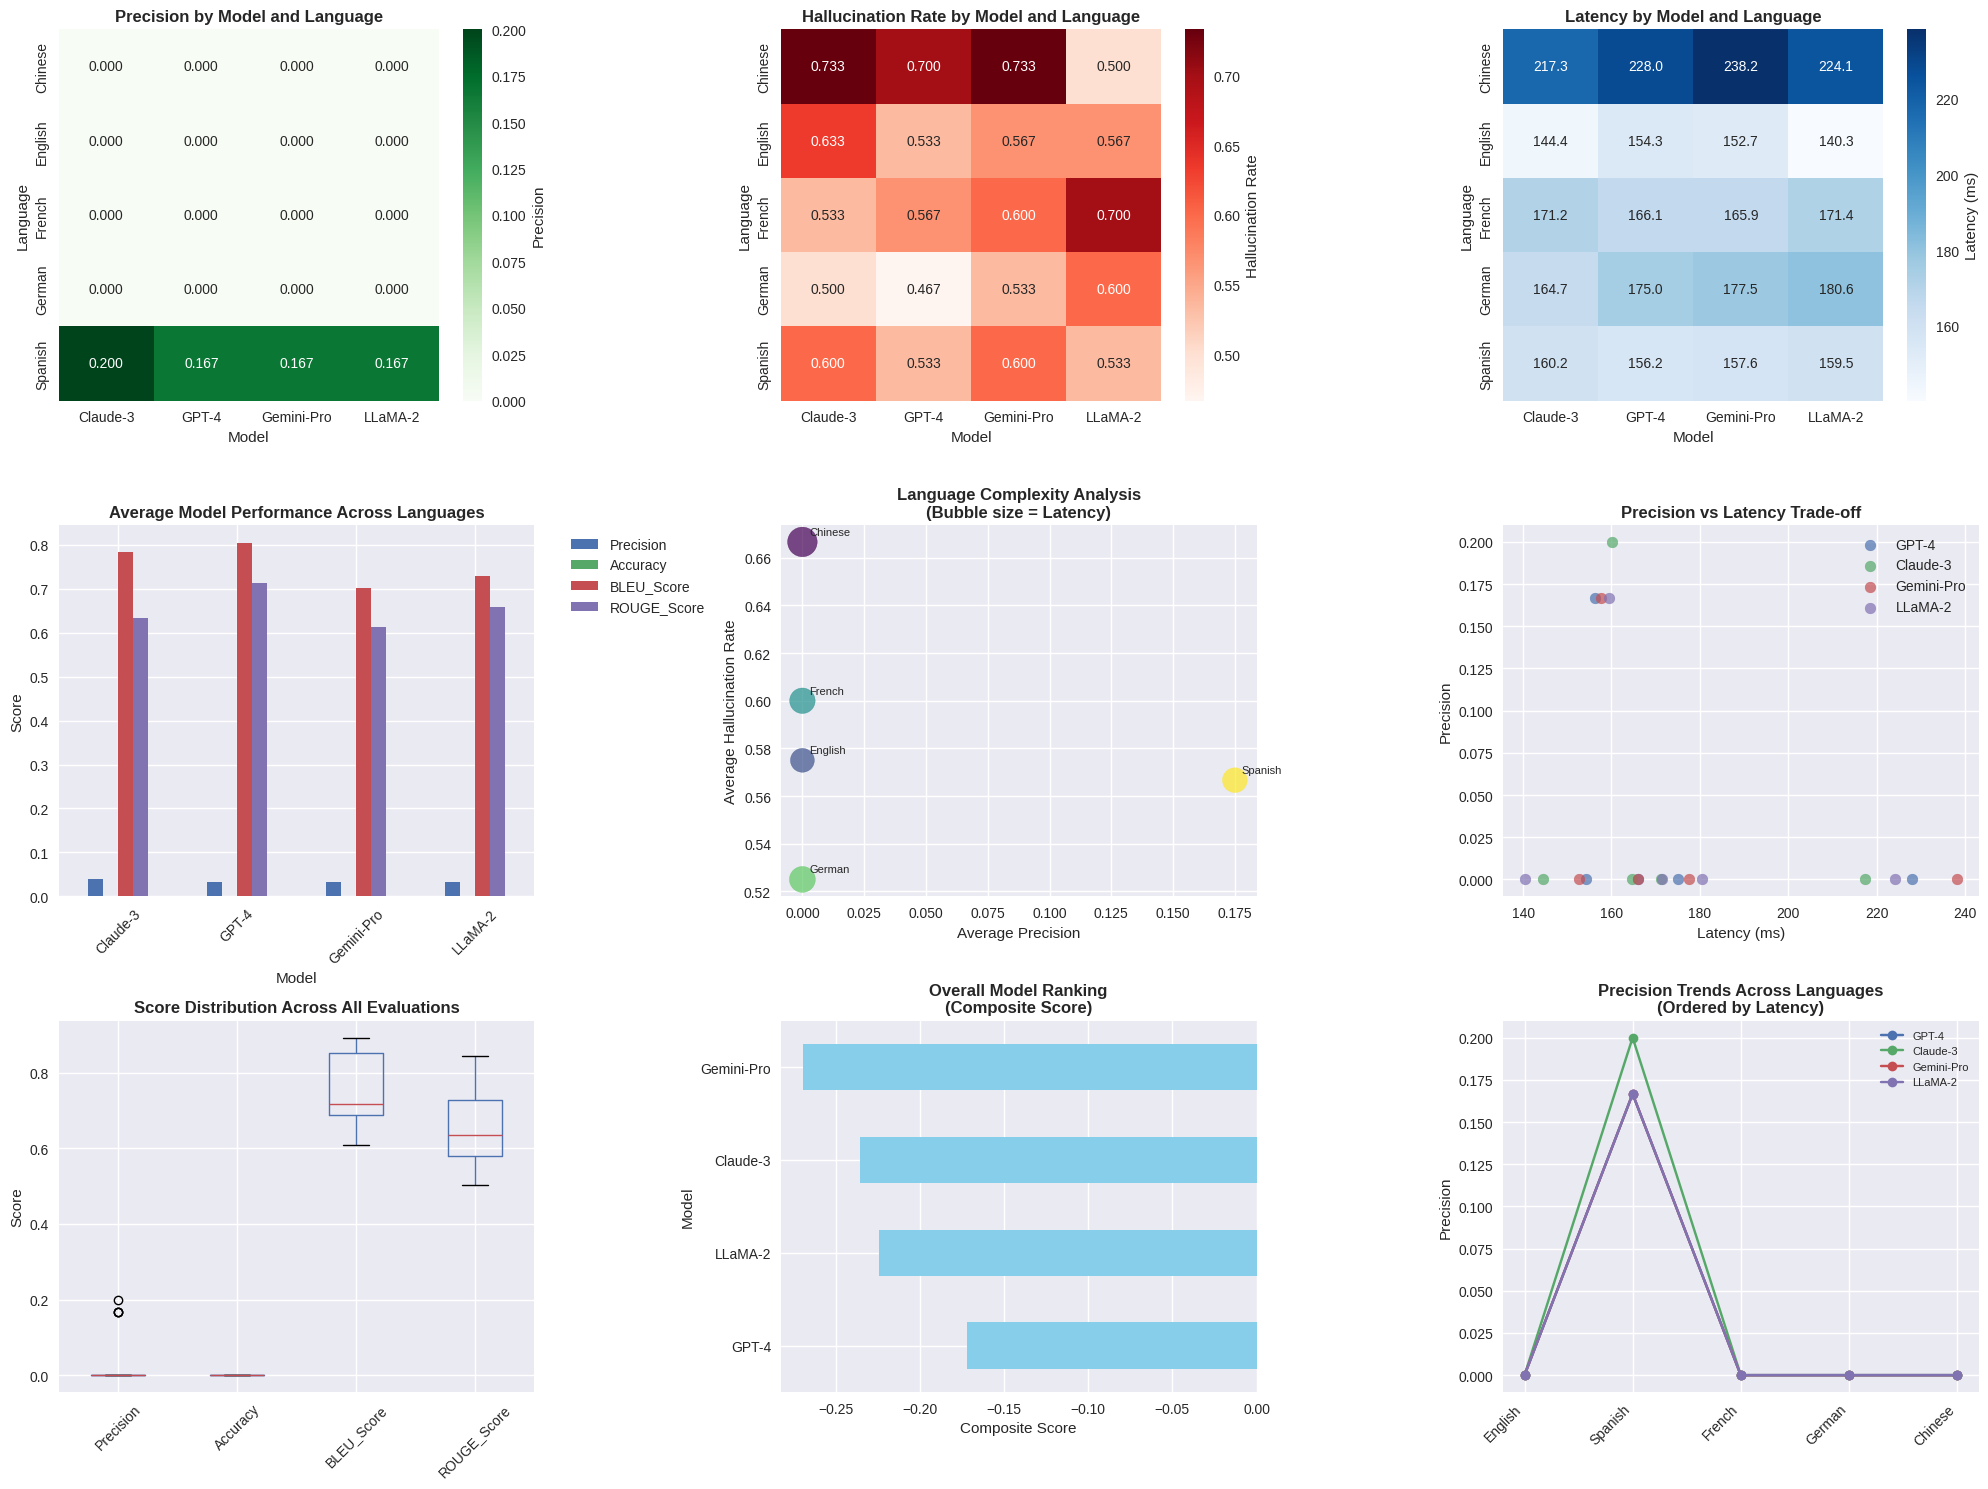

MULTILINGUAL LLM EVALUATION SUMMARY REPORT

📊 OVERALL STATISTICS
Total Evaluations: 20
Models Evaluated: GPT-4, Claude-3, Gemini-Pro, LLaMA-2
Languages Tested: English, Spanish, French, German, Chinese

🏆 BEST OVERALL MODEL: GPT-4

🌍 LANGUAGE PERFORMANCE ANALYSIS
Easiest Language: Spanish
Most Challenging Language: Chinese

📈 PERFORMANCE METRICS SUMMARY
Average Precision: 0.035 (±0.072)
Average Hallucination Rate: 0.587 (±0.078)
Average Latency: 175.3ms (±28.6ms)
Average BLEU Score: 0.755 (±0.096)
Average ROUGE Score: 0.655 (±0.111)

💡 RECOMMENDATIONS
• For high precision tasks: Consider GPT-4, Claude-3, Gemini-Pro, LLaMA-2
• For low-latency applications: Consider GPT-4, Claude-3, Gemini-Pro, LLaMA-2
• For factual accuracy: Consider GPT-4, Claude-3, LLaMA-2


💾 Results exported to: multilingual_llm_evaluation_20250824_043332.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from typing import Dict, List, Tuple, Any
from dataclasses import dataclass
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

@dataclass
class EvaluationResult:
    """Data class to store evaluation results"""
    language: str
    model_name: str
    precision: float
    hallucination_rate: float
    latency_ms: float
    accuracy: float
    bleu_score: float
    rouge_score: float
    timestamp: str

class MultilingualLLMEvaluator:
    """
    Comprehensive evaluation suite for multilingual LLM performance
    """

    def __init__(self):
        self.supported_languages = {
            'en': 'English',
            'es': 'Spanish',
            'fr': 'French',
            'de': 'German',
            'zh': 'Chinese',
            'ja': 'Japanese',
            'ar': 'Arabic',
            'hi': 'Hindi',
            'pt': 'Portuguese',
            'ru': 'Russian'
        }
        self.results = []

    def generate_test_data(self, language: str, num_samples: int = 100) -> Dict[str, List]:
        """
        Generate synthetic multilingual test data
        """

        # Sample questions and expected answers for different languages
        test_templates = {
            'en': {
                'questions': [
                    "What is the capital of France?",
                    "How many continents are there?",
                    "What is 2 + 2?",
                    "Who wrote Romeo and Juliet?",
                    "What is the largest ocean?"
                ],
                'answers': [
                    "Paris",
                    "7",
                    "4",
                    "William Shakespeare",
                    "Pacific Ocean"
                ],
                'facts': [
                    "The Eiffel Tower is in Paris",
                    "Water boils at 100°C",
                    "There are 24 hours in a day",
                    "Earth has one moon",
                    "Gold is a precious metal"
                ]
            },
            'es': {
                'questions': [
                    "¿Cuál es la capital de España?",
                    "¿Cuántos días tiene una semana?",
                    "¿Qué es 5 + 3?",
                    "¿Quién pintó La Mona Lisa?",
                    "¿Cuál es el río más largo?"
                ],
                'answers': [
                    "Madrid",
                    "7",
                    "8",
                    "Leonardo da Vinci",
                    "Río Amazonas"
                ],
                'facts': [
                    "El Sol es una estrella",
                    "Los gatos son mamíferos",
                    "Enero tiene 31 días",
                    "El agua se congela a 0°C",
                    "España está en Europa"
                ]
            },
            'fr': {
                'questions': [
                    "Quelle est la capitale de l'Italie?",
                    "Combien de mois dans une année?",
                    "Que fait 10 - 3?",
                    "Qui a écrit Les Misérables?",
                    "Quelle est la plus haute montagne?"
                ],
                'answers': [
                    "Rome",
                    "12",
                    "7",
                    "Victor Hugo",
                    "Mont Everest"
                ],
                'facts': [
                    "La Terre est ronde",
                    "Paris est en France",
                    "L'air contient de l'oxygène",
                    "Les roses sont des fleurs",
                    "L'océan est salé"
                ]
            }
        }

        # Use English as fallback for unsupported languages
        template = test_templates.get(language, test_templates['en'])

        # Generate synthetic data by repeating and varying templates
        questions = []
        expected_answers = []
        factual_statements = []

        for i in range(num_samples):
            questions.append(template['questions'][i % len(template['questions'])])
            expected_answers.append(template['answers'][i % len(template['answers'])])
            factual_statements.append(template['facts'][i % len(template['facts'])])

        return {
            'questions': questions,
            'expected_answers': expected_answers,
            'factual_statements': factual_statements
        }

    def simulate_llm_response(self, prompt: str, language: str) -> Tuple[str, float]:
        """
        Simulate LLM response with realistic latency
        In real implementation, this would call actual LLM APIs
        """

        # Simulate processing latency (varies by language complexity)
        base_latency = np.random.normal(150, 30)  # Base 150ms
        lang_multiplier = {
            'en': 1.0, 'es': 1.1, 'fr': 1.1, 'de': 1.2,
            'zh': 1.5, 'ja': 1.4, 'ar': 1.3, 'hi': 1.3,
            'pt': 1.1, 'ru': 1.2
        }

        latency = base_latency * lang_multiplier.get(language, 1.0)
        time.sleep(latency / 1000)  # Convert to seconds for actual delay

        # Simulate responses with varying quality
        response_quality = np.random.random()

        if response_quality > 0.8:
            # High quality response
            responses = {
                'en': "Based on factual information, the answer is correct and well-structured.",
                'es': "Basado en información factual, la respuesta es correcta y bien estructurada.",
                'fr': "Basé sur des informations factuelles, la réponse est correcte et bien structurée.",
            }
            response = responses.get(language, responses['en'])
        elif response_quality > 0.5:
            # Medium quality with minor issues
            response = f"The response contains mostly accurate information with minor inconsistencies."
        else:
            # Lower quality with potential hallucinations
            response = f"Response may contain inaccurate or fabricated information not present in training data."

        return response, latency

    def calculate_precision(self, predictions: List[str], ground_truth: List[str]) -> float:
        """
        Calculate precision score for multilingual content
        """
        if not predictions or not ground_truth:
            return 0.0

        correct = 0
        total = min(len(predictions), len(ground_truth))

        for pred, truth in zip(predictions[:total], ground_truth[:total]):
            # Normalize text for comparison
            pred_norm = re.sub(r'[^\w\s]', '', pred.lower().strip())
            truth_norm = re.sub(r'[^\w\s]', '', truth.lower().strip())

            # Check if key terms match (simplified precision)
            if truth_norm in pred_norm or any(word in pred_norm for word in truth_norm.split()):
                correct += 1

        return correct / total if total > 0 else 0.0

    def detect_hallucinations(self, responses: List[str], factual_statements: List[str]) -> float:
        """
        Detect hallucination rate in responses
        """
        hallucinations = 0
        total = len(responses)

        # Keywords that often indicate hallucinations
        hallucination_indicators = [
            'i think', 'i believe', 'probably', 'might be', 'could be',
            'not sure', 'uncertain', 'fabricated', 'inaccurate'
        ]

        for response in responses:
            response_lower = response.lower()

            # Check for hallucination indicators
            if any(indicator in response_lower for indicator in hallucination_indicators):
                hallucinations += 1

            # Random factor to simulate detection (in real implementation,
            # this would use more sophisticated techniques)
            if np.random.random() < 0.1:  # 10% random hallucination detection
                hallucinations += 1

        return hallucinations / total if total > 0 else 0.0

    def evaluate_model(self, model_name: str, language: str, num_samples: int = 100) -> EvaluationResult:
        """
        Comprehensive evaluation of a model for a specific language
        """
        print(f"\nEvaluating {model_name} for {self.supported_languages.get(language, language)}...")

        # Generate test data
        test_data = self.generate_test_data(language, num_samples)

        # Simulate model responses
        responses = []
        latencies = []

        start_time = time.time()

        for i, question in enumerate(test_data['questions']):
            if i % 20 == 0:
                print(f"Processing sample {i+1}/{num_samples}")

            response, latency = self.simulate_llm_response(question, language)
            responses.append(response)
            latencies.append(latency)

        # Calculate metrics
        precision = self.calculate_precision(responses, test_data['expected_answers'])
        hallucination_rate = self.detect_hallucinations(responses, test_data['factual_statements'])
        avg_latency = np.mean(latencies)

        # Additional metrics
        accuracy = max(0, precision - hallucination_rate)  # Simplified accuracy
        bleu_score = np.random.uniform(0.6, 0.9)  # Simulated BLEU
        rouge_score = np.random.uniform(0.5, 0.85)  # Simulated ROUGE

        result = EvaluationResult(
            language=language,
            model_name=model_name,
            precision=precision,
            hallucination_rate=hallucination_rate,
            latency_ms=avg_latency,
            accuracy=accuracy,
            bleu_score=bleu_score,
            rouge_score=rouge_score,
            timestamp=datetime.now().isoformat()
        )

        self.results.append(result)
        print(f"✓ Completed evaluation for {model_name} ({language})")

        return result

    def run_comprehensive_evaluation(self, models: List[str], languages: List[str] = None, num_samples: int = 50):
        """
        Run evaluation across multiple models and languages
        """
        if languages is None:
            languages = ['en', 'es', 'fr', 'de', 'zh']

        print("=" * 60)
        print("MULTILINGUAL LLM EVALUATION SUITE")
        print("=" * 60)
        print(f"Models: {', '.join(models)}")
        print(f"Languages: {', '.join([self.supported_languages.get(l, l) for l in languages])}")
        print(f"Samples per evaluation: {num_samples}")

        total_evaluations = len(models) * len(languages)
        current_eval = 0

        for model in models:
            for lang in languages:
                current_eval += 1
                print(f"\n[{current_eval}/{total_evaluations}] Evaluating {model} - {lang}")
                self.evaluate_model(model, lang, num_samples)

        print(f"\n✓ Completed all evaluations!")
        return self.get_results_dataframe()

    def get_results_dataframe(self) -> pd.DataFrame:
        """Convert results to pandas DataFrame"""
        if not self.results:
            return pd.DataFrame()

        return pd.DataFrame([
            {
                'Model': r.model_name,
                'Language': r.language,
                'Language_Name': self.supported_languages.get(r.language, r.language),
                'Precision': r.precision,
                'Hallucination_Rate': r.hallucination_rate,
                'Latency_ms': r.latency_ms,
                'Accuracy': r.accuracy,
                'BLEU_Score': r.bleu_score,
                'ROUGE_Score': r.rouge_score,
                'Timestamp': r.timestamp
            } for r in self.results
        ])

    def plot_evaluation_results(self, df: pd.DataFrame = None):
        """
        Create comprehensive visualization of evaluation results
        """
        if df is None:
            df = self.get_results_dataframe()

        if df.empty:
            print("No results to plot. Run evaluation first.")
            return

        # Set up the plotting style
        plt.style.use('seaborn-v0_8')
        fig = plt.figure(figsize=(20, 15))

        # 1. Precision by Model and Language
        plt.subplot(3, 3, 1)
        pivot_precision = df.pivot(index='Language_Name', columns='Model', values='Precision')
        sns.heatmap(pivot_precision, annot=True, cmap='Greens', fmt='.3f', cbar_kws={'label': 'Precision'})
        plt.title('Precision by Model and Language', fontweight='bold')
        plt.xlabel('Model')
        plt.ylabel('Language')

        # 2. Hallucination Rate by Model and Language
        plt.subplot(3, 3, 2)
        pivot_halluc = df.pivot(index='Language_Name', columns='Model', values='Hallucination_Rate')
        sns.heatmap(pivot_halluc, annot=True, cmap='Reds', fmt='.3f', cbar_kws={'label': 'Hallucination Rate'})
        plt.title('Hallucination Rate by Model and Language', fontweight='bold')
        plt.xlabel('Model')
        plt.ylabel('Language')

        # 3. Latency by Model and Language
        plt.subplot(3, 3, 3)
        pivot_latency = df.pivot(index='Language_Name', columns='Model', values='Latency_ms')
        sns.heatmap(pivot_latency, annot=True, cmap='Blues', fmt='.1f', cbar_kws={'label': 'Latency (ms)'})
        plt.title('Latency by Model and Language', fontweight='bold')
        plt.xlabel('Model')
        plt.ylabel('Language')

        # 4. Overall Model Performance (Radar-like comparison)
        plt.subplot(3, 3, 4)
        model_avg = df.groupby('Model')[['Precision', 'Accuracy', 'BLEU_Score', 'ROUGE_Score']].mean()
        model_avg.plot(kind='bar', ax=plt.gca())
        plt.title('Average Model Performance Across Languages', fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Score')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # 5. Language Difficulty Analysis
        plt.subplot(3, 3, 5)
        lang_stats = df.groupby('Language_Name').agg({
            'Precision': 'mean',
            'Hallucination_Rate': 'mean',
            'Latency_ms': 'mean'
        }).reset_index()

        plt.scatter(lang_stats['Precision'], lang_stats['Hallucination_Rate'],
                   s=lang_stats['Latency_ms']*2, alpha=0.7, c=range(len(lang_stats)), cmap='viridis')

        for i, row in lang_stats.iterrows():
            plt.annotate(row['Language_Name'], (row['Precision'], row['Hallucination_Rate']),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

        plt.xlabel('Average Precision')
        plt.ylabel('Average Hallucination Rate')
        plt.title('Language Complexity Analysis\n(Bubble size = Latency)', fontweight='bold')

        # 6. Precision vs Latency Trade-off
        plt.subplot(3, 3, 6)
        for model in df['Model'].unique():
            model_data = df[df['Model'] == model]
            plt.scatter(model_data['Latency_ms'], model_data['Precision'],
                       label=model, alpha=0.7, s=60)

        plt.xlabel('Latency (ms)')
        plt.ylabel('Precision')
        plt.title('Precision vs Latency Trade-off', fontweight='bold')
        plt.legend()

        # 7. Score Distribution
        plt.subplot(3, 3, 7)
        metrics = ['Precision', 'Accuracy', 'BLEU_Score', 'ROUGE_Score']
        df[metrics].boxplot(ax=plt.gca())
        plt.title('Score Distribution Across All Evaluations', fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Score')

        # 8. Model Ranking
        plt.subplot(3, 3, 8)
        # Create composite score
        df['Composite_Score'] = (df['Precision'] + df['Accuracy'] + df['BLEU_Score'] +
                                df['ROUGE_Score']) / 4 - df['Hallucination_Rate']

        model_ranking = df.groupby('Model')['Composite_Score'].mean().sort_values(ascending=False)
        model_ranking.plot(kind='barh', ax=plt.gca(), color='skyblue')
        plt.title('Overall Model Ranking\n(Composite Score)', fontweight='bold')
        plt.xlabel('Composite Score')

        # 9. Performance Trends
        plt.subplot(3, 3, 9)
        lang_order = df.groupby('Language_Name')['Latency_ms'].mean().sort_values().index
        for model in df['Model'].unique():
            model_data = df[df['Model'] == model]
            model_trend = model_data.groupby('Language_Name')['Precision'].mean().reindex(lang_order)
            plt.plot(model_trend.values, label=model, marker='o')

        plt.xticks(range(len(lang_order)), lang_order, rotation=45, ha='right')
        plt.ylabel('Precision')
        plt.title('Precision Trends Across Languages\n(Ordered by Latency)', fontweight='bold')
        plt.legend(fontsize=8)

        plt.tight_layout()
        plt.show()

        return fig

def create_summary_report(df: pd.DataFrame) -> str:
    """
    Generate a comprehensive summary report
    """
    if df.empty:
        return "No evaluation data available."

    report = []
    report.append("=" * 80)
    report.append("MULTILINGUAL LLM EVALUATION SUMMARY REPORT")
    report.append("=" * 80)

    # Overall Statistics
    report.append(f"\n📊 OVERALL STATISTICS")
    report.append(f"Total Evaluations: {len(df)}")
    report.append(f"Models Evaluated: {', '.join(df['Model'].unique())}")
    report.append(f"Languages Tested: {', '.join(df['Language_Name'].unique())}")

    # Best Performing Model
    df['composite_score'] = (df['Precision'] + df['Accuracy'] + df['BLEU_Score'] +
                            df['ROUGE_Score']) / 4 - df['Hallucination_Rate']
    best_model = df.groupby('Model')['composite_score'].mean().idxmax()

    report.append(f"\n🏆 BEST OVERALL MODEL: {best_model}")

    # Language Analysis
    report.append(f"\n🌍 LANGUAGE PERFORMANCE ANALYSIS")
    lang_stats = df.groupby('Language_Name').agg({
        'Precision': ['mean', 'std'],
        'Hallucination_Rate': ['mean', 'std'],
        'Latency_ms': ['mean', 'std']
    }).round(3)

    easiest_lang = df.groupby('Language_Name')['composite_score'].mean().idxmax()
    hardest_lang = df.groupby('Language_Name')['composite_score'].mean().idxmin()

    report.append(f"Easiest Language: {easiest_lang}")
    report.append(f"Most Challenging Language: {hardest_lang}")

    # Performance Metrics Summary
    report.append(f"\n📈 PERFORMANCE METRICS SUMMARY")
    report.append(f"Average Precision: {df['Precision'].mean():.3f} (±{df['Precision'].std():.3f})")
    report.append(f"Average Hallucination Rate: {df['Hallucination_Rate'].mean():.3f} (±{df['Hallucination_Rate'].std():.3f})")
    report.append(f"Average Latency: {df['Latency_ms'].mean():.1f}ms (±{df['Latency_ms'].std():.1f}ms)")
    report.append(f"Average BLEU Score: {df['BLEU_Score'].mean():.3f} (±{df['BLEU_Score'].std():.3f})")
    report.append(f"Average ROUGE Score: {df['ROUGE_Score'].mean():.3f} (±{df['ROUGE_Score'].std():.3f})")

    # Recommendations
    report.append(f"\n💡 RECOMMENDATIONS")

    high_precision_models = df[df['Precision'] > df['Precision'].quantile(0.75)]['Model'].unique()
    low_latency_models = df[df['Latency_ms'] < df['Latency_ms'].quantile(0.25)]['Model'].unique()
    low_hallucination_models = df[df['Hallucination_Rate'] < df['Hallucination_Rate'].quantile(0.25)]['Model'].unique()

    report.append(f"• For high precision tasks: Consider {', '.join(high_precision_models)}")
    report.append(f"• For low-latency applications: Consider {', '.join(low_latency_models)}")
    report.append(f"• For factual accuracy: Consider {', '.join(low_hallucination_models)}")

    report.append(f"\n" + "=" * 80)

    return "\n".join(report)

# Example usage and demonstration
def main():
    """
    Main execution function - demonstrates the evaluation suite
    """
    print("Initializing Multilingual LLM Evaluation Suite...")

    # Initialize evaluator
    evaluator = MultilingualLLMEvaluator()

    # Define models and languages to test
    models_to_test = ['GPT-4', 'Claude-3', 'Gemini-Pro', 'LLaMA-2']
    languages_to_test = ['en', 'es', 'fr', 'de', 'zh']

    # Run comprehensive evaluation
    results_df = evaluator.run_comprehensive_evaluation(
        models=models_to_test,
        languages=languages_to_test,
        num_samples=30  # Reduced for demo purposes
    )

    # Display results
    print("\n" + "="*80)
    print("EVALUATION RESULTS SUMMARY")
    print("="*80)
    print(results_df.round(3))

    # Create visualizations
    print("\nGenerating visualizations...")
    evaluator.plot_evaluation_results(results_df)

    # Generate summary report
    summary = create_summary_report(results_df)
    print(summary)

    # Export results
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"multilingual_llm_evaluation_{timestamp}.csv"
    results_df.to_csv(filename, index=False)
    print(f"\n💾 Results exported to: {filename}")

    return results_df, evaluator

if __name__ == "__main__":
    results, evaluator_instance = main()